In [105]:
# Load Packages
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [106]:
# Load Data First
df = pd.read_csv("C:\\Users\\raksh\\OneDrive\\Desktop\\Semester 2\\Programming for DS\\Project\\archive\\heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [107]:
##starting the EDA right away

num_duplicates = df.duplicated().sum()
num_duplicates
#no duplicate values in the dataset

0

In [108]:
df.describe

<bound method NDFrame.describe of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDis

In [109]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [110]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

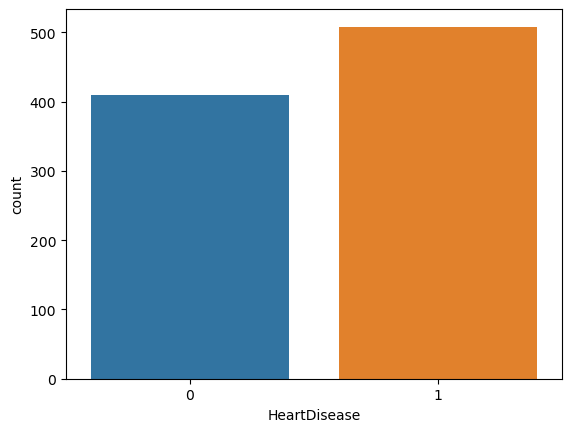

In [111]:
# Visualize the distribution of the target variable
sns.countplot(x='HeartDisease', data=df)
plt.show()

In [112]:
var = ['Age', 'RestingBP'] #one is negatively skewed and the other is positively skewed
df[var].describe(percentiles=[0.01,0.99]) #going for the classic age vs resting bp

,Age,RestingBP
count,918.000000,918.000000
mean,53.510893,132.396514
std,9.432617,18.514154
min,28.000000,0.000000
1%,32.000000,95.000000
50%,54.000000,130.000000
99%,74.000000,180.000000
max,77.000000,200.000000


Text(0, 0.5, 'Frequency')

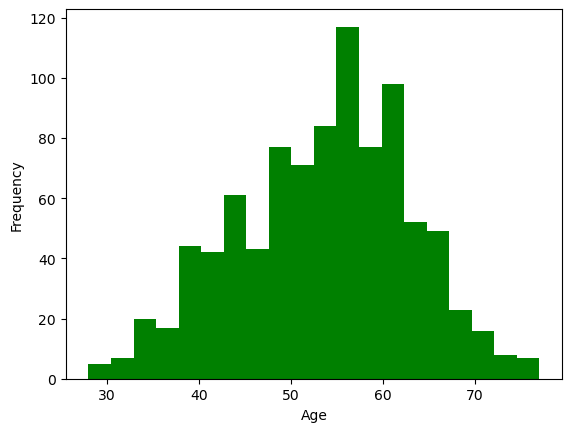

In [113]:
#time for histograms

plt.hist(df['Age'],bins=20,color='g') #for age
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

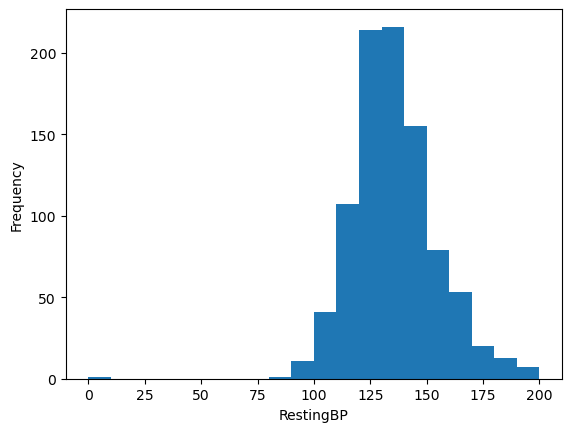

In [114]:
plt.hist(df['RestingBP'],bins=20) #for resting BP
plt.xlabel('RestingBP')
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Age', ylabel='Count'>

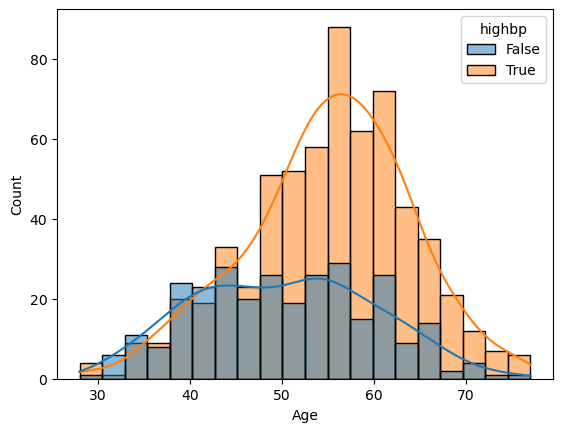

In [115]:
df['highbp'] = df['RestingBP']>120
sns.histplot(data=df, x = 'Age', hue = 'highbp', kde = True, bins = 20) 

#age vs resting BP bar plot
#is there is a possibility of a liner regression?

<AxesSubplot:xlabel='highbp', ylabel='Age'>

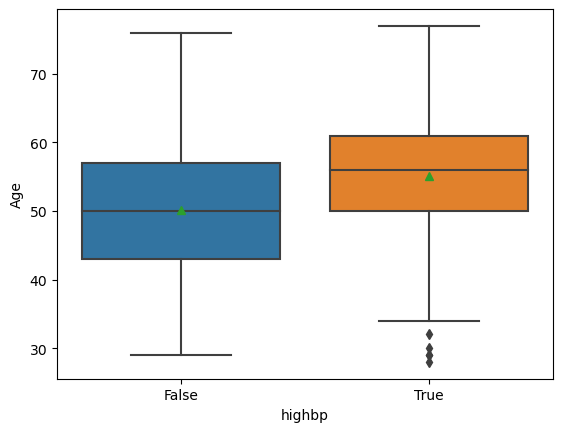

In [116]:
# Seaborn Case

sns.boxplot(data = df, x = 'highbp', y = 'Age', showmeans = True)

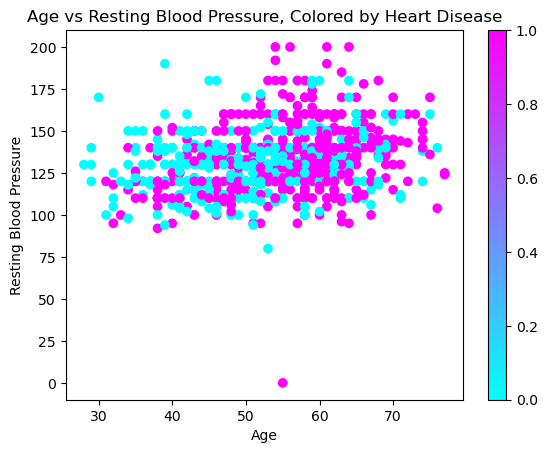

In [117]:
# Create a scatter plot of age vs resting blood pressure, colored by heart disease status

plt.scatter(df['Age'], df['RestingBP'], c=df['HeartDisease'], cmap='cool')
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Age vs Resting Blood Pressure, Colored by Heart Disease')
plt.colorbar()
plt.show()

#there is a outlier which we might have to clean later

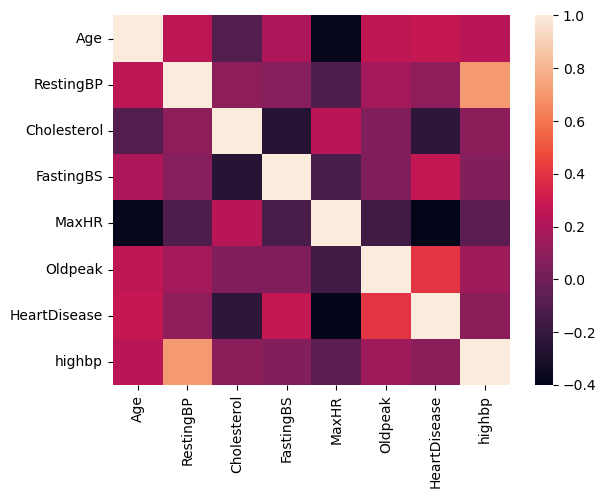

In [118]:
# Visualize the correlation matrix
sns.heatmap(df.corr())
plt.show()
#correlation coefficients as colors, with red indicating positive correlation 
#and blue indicating negative correlation.

In [123]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,highbp
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,True
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,True
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,True


In [216]:
X = df.drop(["HeartDisease"], axis=1) #all the columns without the Heart Dease column (independent variables)
y = df["HeartDisease"] #target variable
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)


In [217]:
df_encoded = pd.get_dummies(X, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','highbp']) 
#creating a new df with the categorical variables
#The get_dummies function will create new columns for each unique value in the categorical variable, 
#with a value of 1 indicating that the row had that value for that variable, and 0 otherwise.

In [218]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #to calculate the mean and standard deviation of the training data 
X_test = scaler.transform(X_test) #apply the same scaling to the testing data
#scaling the X_train and X_test

In [219]:
df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,highbp_False,highbp_True
0,40,140,289,0,172,0.0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,1
1,49,160,180,0,156,1.0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,1,1,0,0,0,1,0,1
3,48,138,214,0,108,1.5,1,0,1,0,...,0,1,0,0,1,0,1,0,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,1


In [220]:
X_train

array([[-1.24506731, -0.70898547,  0.372803  , ..., -0.84792072,
         1.51865279, -1.51865279],
       [-1.8862362 , -0.16628515,  0.08614581, ...,  1.17935554,
        -0.65847836,  0.65847836],
       [ 0.25099346,  0.91911549,  0.12313384, ..., -0.84792072,
        -0.65847836,  0.65847836],
       ...,
       [ 0.67843939, -0.16628515,  0.49301407, ...,  1.17935554,
        -0.65847836,  0.65847836],
       [ 0.67843939,  1.02765555, -1.84647842, ...,  1.17935554,
        -0.65847836,  0.65847836],
       [-1.45879027,  0.91911549,  1.77834789, ..., -0.84792072,
        -0.65847836,  0.65847836]])

In [221]:
#Logistic Regression model

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
ypred = log_reg.predict(X_test)

## (b) Accuracy (remember to predict first)
print("accuracy test set:",log_reg.score(X_test,y_test))

ypred = log_reg.predict(X_test)

print("confirmation",np.mean(ypred == y_test))

print(log_reg.coef_, log_reg.intercept_)

print("accuracy train set",log_reg.score(X_train, y_train))

accuracy test set: 0.8532608695652174
confirmation 0.8532608695652174
[[ 0.12625714 -0.04012701 -0.52772764  0.42722014 -0.10781927  0.49252498
  -0.27204548  0.27204548  0.43370029 -0.23630152 -0.27058025 -0.0544441
   0.09039     0.00492335 -0.0983996  -0.26710973  0.26710973 -0.03011028
   0.6061586  -0.59900606 -0.05663752  0.05663752]] [0.2719075]
accuracy train set 0.8732970027247956


In [222]:
# Confusion Matrix (logistic):
from sklearn.metrics import confusion_matrix

cm_log = confusion_matrix(y_test, ypred)

print(cm_log)

# precision, recall and f1 score
precision_log = cm_log[1,1]/(cm_log[1,1] + cm_log[0,1])

recall_log = cm_log[1,1]/(cm_log[1,1] + cm_log[1,0])

f1_score_log = 2*precision_log*recall_log/(precision_log + recall_log)

precision_log, recall_log, f1_score_log

[[67 10]
 [17 90]]


(0.9, 0.8411214953271028, 0.8695652173913043)

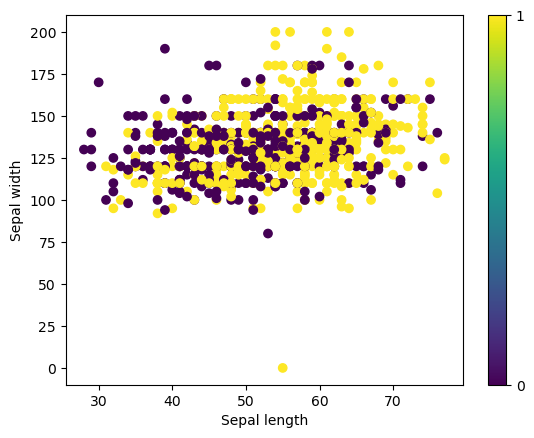

In [223]:
## Visualization of the data set

X = df_encoded.iloc[:, :2] # we only take the first two features.
Y = df["HeartDisease"]

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=Y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.colorbar(ticks = [0,1,2])
plt.show()

In [236]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

# Define objective, train the model.
knn = KNeighborsClassifier(n_neighbors=5, p=2)

knn.fit(X_train, y_train)
ypred = knn.predict(X_test)

# Do prediction, get accuracy
print("accuracy test set:",knn.score(X_test, y_test))

accuracy test set: 0.8586956521739131


In [234]:
# Confusion Matrix (KNN):
cm_log = confusion_matrix(y_test, ypred)

print(cm_log)

# precision, recall and f1 score
precision_log = cm_log[1,1]/(cm_log[1,1] + cm_log[0,1])

recall_log = cm_log[1,1]/(cm_log[1,1] + cm_log[1,0])

f1_score_log = 2*precision_log*recall_log/(precision_log + recall_log)

precision_log, recall_log, f1_score_log

[[66 11]
 [15 92]]


(0.8932038834951457, 0.8598130841121495, 0.8761904761904761)

In [227]:
from sklearn.model_selection import GridSearchCV

# define function

knn = KNeighborsClassifier()

# define a list of parameters
param_knn = {'n_neighbors': range(3,22,2)}  #neigbours values from 3 to 21, in steps of 2

#apply grid search
grid_knn = GridSearchCV(knn, param_knn)

grid_knn.fit(X_train, y_train)


# the best hyperparameter chosen:

print(grid_knn.best_params_)


# When the best k is chosen, its validation score of through CV is:
print(grid_knn.best_score_)

# For each different grid, show the mean test(validation) score and mean training score (across 5 folds CV)
grid_knn.cv_results_

# Show how best_score_ is obtained

grid_knn.cv_results_['mean_test_score'].max()

print(grid_knn.best_estimator_.score(X_test, y_test))

cm = confusion_matrix(y_test, grid_knn.best_estimator_.predict(X_test))

print(cm)


{'n_neighbors': 19}
0.8691734227937751
0.875
[[68  9]
 [14 93]]


In [238]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("accuracy test set:",rf.score(X_test, y_test))

accuracy test set: 0.8967391304347826


In [239]:
# Confusion Matrix (Random Forest):
cm_log = confusion_matrix(y_test, ypred)

print(cm_log)

# precision, recall and f1 score
precision_log = cm_log[1,1]/(cm_log[1,1] + cm_log[0,1])

recall_log = cm_log[1,1]/(cm_log[1,1] + cm_log[1,0])

f1_score_log = 2*precision_log*recall_log/(precision_log + recall_log)

precision_log, recall_log, f1_score_log

[[66 11]
 [15 92]]


(0.8932038834951457, 0.8598130841121495, 0.8761904761904761)

In [240]:
# Define the hyperparameters to tune
param_rf = {'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Create a GridSearchCV object and fit it to the data
grid_rf = GridSearchCV(rf, param_rf, cv=5)
grid_rf.fit(X_train, y_train)

# the best hyperparameter chosen:

print(grid_rf.best_params_)


# When the best k is chosen, its validation score of through CV is:
print(grid_rf.best_score_)

# For each different grid, show the mean test(validation) score and mean training score (across 5 folds CV)
grid_rf.cv_results_

# Show how best_score_ is obtained

grid_rf.cv_results_['mean_test_score'].max()

print(grid_rf.best_estimator_.score(X_test, y_test))


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
0.8732643742428479
0.8586956521739131


In [197]:
# XGB Model

# Define objective, train the model.
basic_model = xgb.XGBClassifier()

basic_model.fit(X_train, y_train)
ypred = basic_model.predict(X_test)

# Do prediction, get accuracy
print("accuracy test set:", basic_model.score(X_test, y_test))

accuracy test set: 0.875


In [198]:
# Confusion Matrix (XGB):
cm_log = confusion_matrix(y_test, ypred)

print(cm_log)

# precision, recall and f1 score
precision_log = cm_log[1,1]/(cm_log[1,1] + cm_log[0,1])

recall_log = cm_log[1,1]/(cm_log[1,1] + cm_log[1,0])

f1_score_log = 2*precision_log*recall_log/(precision_log + recall_log)

precision_log, recall_log, f1_score_log

[[69  8]
 [15 92]]


(0.92, 0.8598130841121495, 0.888888888888889)

In [199]:
#XGBoost Model

# define the XGBoost model
model = xgb.XGBClassifier()

# define the hyperparameters to tune using GridSearchCV
param_xgb = {'learning_rate': [0.01, 0.1, 0.5],
             'max_depth': [3, 5, 7],
             'n_estimators': [50, 100, 200]}

# apply grid search to find the best hyperparameters
grid_xgb = GridSearchCV(model, param_xgb)
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_c

In [201]:
print(grid_xgb.best_params_)

# evaluate the model on the test set using the best hyperparameters
y_pred = grid_xgb.best_estimator_.predict(X_test)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [203]:
from sklearn.tree import DecisionTreeClassifier

# A Basic Tree

basic_tree = DecisionTreeClassifier(criterion='entropy', random_state=43, max_depth=3)

# Train the Model

basic_tree.fit(X_train, y_train)
ypred = basic_tree.predict(X_test)

# Obtain and print accuracy

print("accuracy test set:",basic_tree.score(X_test, y_test))


accuracy test set: 0.8315217391304348


In [204]:
# Confusion Matrix (Decision Tree):
cm_log = confusion_matrix(y_test, ypred)

print(cm_log)

# precision, recall and f1 score
precision_log = cm_log[1,1]/(cm_log[1,1] + cm_log[0,1])

recall_log = cm_log[1,1]/(cm_log[1,1] + cm_log[1,0])

f1_score_log = 2*precision_log*recall_log/(precision_log + recall_log)

precision_log, recall_log, f1_score_log

[[66 11]
 [20 87]]


(0.8877551020408163, 0.8130841121495327, 0.848780487804878)

In [205]:
# GridSearch + CV
from sklearn.model_selection import GridSearchCV

# Define Function
opt_tree = DecisionTreeClassifier(random_state = 0)

# Define all potential hyperparameters (this time, specify three different hyperparameters)

tree_params = {'max_depth': range(1,11),
               'min_samples_split': range(2,11),
               'max_leaf_nodes': range(2,11)}

# Define GridSearchCV

search_tree = GridSearchCV(opt_tree, tree_params)

# Train the model, and report accuracy

search_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': range(1, 11),
                         'max_leaf_nodes': range(2, 11),
                         'min_samples_split': range(2, 11)})

In [209]:
# Report the accuracy

print("accuracy best parameters:",search_tree.score(X_test, y_test))

# Report the best hyperparameters chosen

print(search_tree.best_params_)

# Report best estimator score

print(search_tree.best_estimator_.score(X_test, y_test))

accuracy best parameters: 0.875
{'max_depth': 4, 'max_leaf_nodes': 10, 'min_samples_split': 2}
0.875


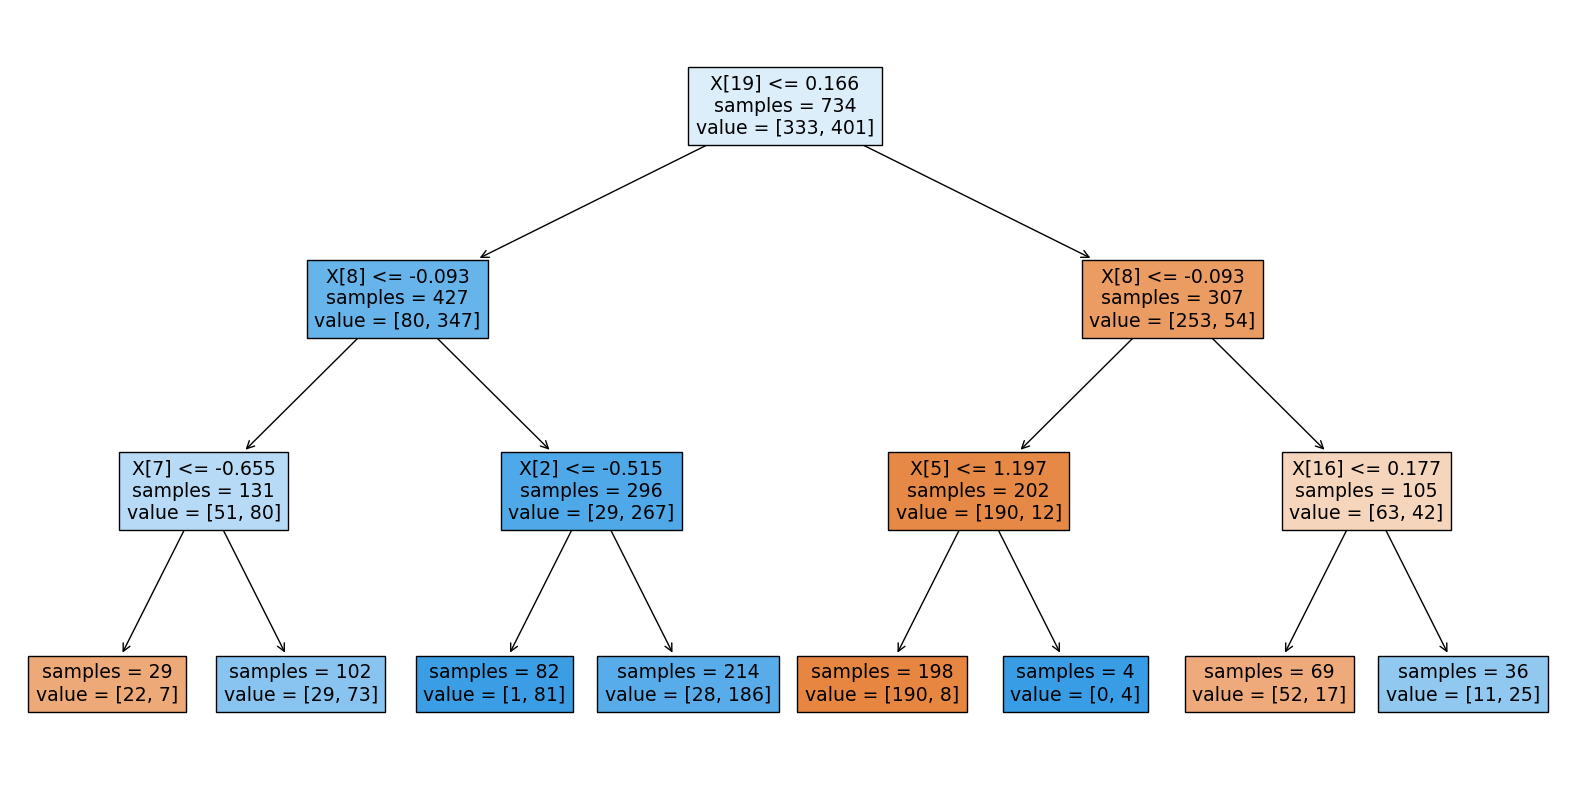

In [141]:
# Plot the decision tree
from sklearn import tree
fig = plt.figure(figsize=(20,10)) # set a proper figure size (in case that the figure is too small to read or ratio is not proper)
tree.plot_tree(basic_tree,
               filled = True, impurity = False) # whether to color the boxes, whether to report gini index
             #   fontsize = 12) # set fontsize to read
plt.show()